# **Dataset Analysis**

In [ ]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
EN_TRAIN_PATH = os.path.join(PROJECT_ROOT, "data", "raw", "train", "mushroom.en-train_nolabel.v1.jsonl")
EN_VAL_PATH = os.path.join(PROJECT_ROOT, "data", "raw", "val", "mushroom.en-val.v2.jsonl")

In [3]:
def load_data(data_path):
    dataset = []
    
    with open(data_path, 'r') as data:
        for line in data:
            dataset.append(json.loads(line))
    
    data.close()

    dataset_df = pd.DataFrame(dataset)

    return dataset_df

In [4]:
train_set = load_data(EN_TRAIN_PATH)
val_set = load_data(EN_VAL_PATH)

In [5]:
train_set.head()

,lang,model_id,model_input,model_output_text,model_output_logits,model_output_tokens
0,EN,togethercomputer/Pythia-Chat-Base-7B,Do all arthropods have antennae?,"Yes, all insects and arachnids (including spi...","[-2.57427001, 5.1865358353, 5.4173498154, 2.32...","[ĠYes, ,, Ġall, Ġinsects, Ġand, Ġar, ach, n, i..."
1,EN,togethercomputer/Pythia-Chat-Base-7B,Do all arthropods have antennae?,"Yes, all insects and arachnids have at least ...","[-2.57427001, 5.1865358353, 5.4173498154, 2.32...","[ĠYes, ,, Ġall, Ġinsects, Ġand, Ġar, ach, n, i..."
2,EN,togethercomputer/Pythia-Chat-Base-7B,Do all arthropods have antennae?,"Yes, all insects and arachnids (including spi...","[-2.57427001, 5.1865358353, 5.4173498154, 2.32...","[ĠYes, ,, Ġall, Ġinsects, Ġand, Ġar, ach, n, i..."
3,EN,togethercomputer/Pythia-Chat-Base-7B,Do all arthropods have antennae?,"Yes, all insects and arachnids (including spi...","[-2.57427001, 5.1865358353, 5.4173498154, 2.32...","[ĠYes, ,, Ġall, Ġinsects, Ġand, Ġar, ach, n, i..."
4,EN,togethercomputer/Pythia-Chat-Base-7B,Do all arthropods have antennae?,"Yes, all insects and arachnids (including spi...","[-2.57427001, 5.1865358353, 5.4173498154, 2.32...","[ĠYes, ,, Ġall, Ġinsects, Ġand, Ġar, ach, n, i..."


In [6]:
qst_count = len(train_set.groupby("model_input"))
model_count = len(train_set.groupby("model_id"))

print(f"There are {qst_count} distinct questions and {len(train_set)} total instances.")
print(f"There are {round(model_count)} distinct LLMs.")

There are 49 distinct questions and 809 total instances.
There are 3 distinct LLMs.


In [7]:
val_set.head()

,id,lang,model_input,model_output_text,model_id,soft_labels,hard_labels,model_output_logits,model_output_tokens
0,val-en-1,EN,What did Petra van Staveren win a gold medal for?,Petra van Stoveren won a silver medal in the 2...,tiiuae/falcon-7b-instruct,"[{'start': 10, 'prob': 0.2, 'end': 12}, {'star...","[[25, 31], [45, 49], [69, 83]]","[-5.5669536591, -11.90533638, -13.0743436813, ...","[Pet, ra, Ġvan, ĠSto, ve, ren, Ġwon, Ġa, Ġsilv..."
1,val-en-2,EN,How many genera does the Erysiphales order con...,The Elysiphale order contains 5 genera.,tiiuae/falcon-7b-instruct,"[{'start': 4, 'prob': 0.2, 'end': 14}, {'start...","[[30, 31]]","[-6.199614048, -13.7564926147, -14.0058326721,...","[The, ĠE, lys, iph, ale, Ġorder, Ġcontains, Ġ,..."
2,val-en-3,EN,Do all arthropods have antennae?,"Yes, all arachnids have antennas. However, not...",tiiuae/falcon-7b-instruct,"[{'start': 0, 'prob': 0.6, 'end': 3}, {'start'...","[[0, 3], [9, 18], [63, 70], [78, 87]]","[-4.8190689087, -16.5279369354, -10.1344690323...","[Yes, ,, Ġall, Ġar, ach, n, ids, Ġhave, Ġanten..."
3,val-en-4,EN,When did Chance the Rapper debut?,Chance the rapper debuted in 2011.,tiiuae/falcon-7b-instruct,"[{'start': 18, 'prob': 0.0909090909, 'end': 29...","[[29, 33]]","[-6.2555613518, -10.9392805099, -13.1335763931...","[Ch, ance, Ġthe, Ġrapper, Ġdebuted, Ġin, Ġ, 20..."
4,val-en-5,EN,What is the UN Sustainable Development Goal 11...,The UN's Sustainable City initiative defines a...,tiiuae/falcon-7b-instruct,"[{'start': 0, 'prob': 0.0909090909, 'end': 9},...","[[70, 227]]","[-3.9737114906, -12.9197320938, -7.2846975327,...","[The, ĠUN, ', s, ĠSustainable, ĠCity, Ġinitiat..."


In [8]:
qst_count = len(val_set.groupby("model_input"))
model_count = len(val_set.groupby("model_id"))

print(f"There are {qst_count} distinct questions.")
print(f"There are {round(model_count)} distinct LLMs.")

There are 50 distinct questions.
There are 3 distinct LLMs.


In [9]:
common_qst_1 = val_set[val_set["model_input"].isin(train_set["model_input"])]
different_qst_1 = val_set[~val_set["model_input"].isin(train_set["model_input"])]

print("VAL -> TRAIN")
print(f"There are {len(common_qst_1)} common and {len(different_qst_1)} different questions.")

common_qst_2 = train_set[train_set["model_input"].isin(val_set["model_input"])]
different_qst_2 = train_set[~train_set["model_input"].isin(val_set["model_input"])]

print("TRAIN -> VAL")
print(f"There are {len(common_qst_2)} common and {len(different_qst_2)} different questions.")

VAL -> TRAIN
There are 49 common and 1 different questions.
TRAIN -> VAL
There are 809 common and 0 different questions.


In [10]:
common_asw_1 = val_set[val_set["model_output_text"].isin(train_set["model_output_text"])]
different_asw_1 = val_set[~val_set["model_output_text"].isin(train_set["model_output_text"])]

print("VAL -> TRAIN")
print(f"There are {len(common_asw_1)} common and {len(different_asw_1)} different answers.")

common_asw_2 = train_set[train_set["model_output_text"].isin(val_set["model_output_text"])]
different_asw_2 = train_set[~train_set["model_output_text"].isin(val_set["model_output_text"])]

print("TRAIN -> VAL")
print(f"There are {len(common_asw_2)} common and {len(different_asw_2)} different answers.")

VAL -> TRAIN
There are 0 common and 50 different answers.
TRAIN -> VAL
There are 0 common and 809 different answers.


In [11]:
def plot_hallucination(data):
    tokens = data["model_output_tokens"]
    probabilities = data["model_output_logits"]
    hard_labels = data["hard_labels"]

    num_tokens = len(tokens)

    token_spans = []
    current_position = 0
    for token in tokens:
        token_start = current_position
        token_end = token_start + len(token)
        token_spans.append((token_start, token_end))
        current_position = token_end

    hard_hallucination_token_indices = set()
    for start_char, end_char in hard_labels:
        for i, (token_start, token_end) in enumerate(token_spans):
            if token_start < end_char and token_end > start_char:
                hard_hallucination_token_indices.add(i)

    soft_hallucination_probs = [None] * num_tokens
    for annotation in data["soft_labels"]:
        start_char, end_char, prob = annotation["start"], annotation["end"], annotation["prob"]
        for i, (token_start, token_end) in enumerate(token_spans):
            if token_start < end_char and token_end > start_char:
                if prob > 0:
                    soft_hallucination_probs[i] = prob

    plt.figure(figsize=(15, 5))
    plt.plot(probabilities, marker='o', linestyle='-', color='b', label='Logits')

    for i in hard_hallucination_token_indices:
        plt.axvspan(i - 0.5, i + 0.5, color='red', alpha=0.3, label="Hallucination Region")

    plt.plot(
        [p if p is not None else None for p in soft_hallucination_probs],
        linestyle='-', color='red', marker='o', linewidth=2, label="Hallucination Probability"
    )

    for i, prob in enumerate(soft_hallucination_probs):
        if prob is not None:
            plt.text(
            i, prob + 0.2,
            f"{prob:.2f}",
            color='red', fontsize=9, ha='center', va='bottom'
        )

    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())

    plt.xticks(ticks=range(len(tokens)), labels=tokens, rotation=90, fontsize=8)
    plt.xlabel("Tokens")
    plt.ylabel("Logit Values / Hallucination Probabilities")
    plt.title("Output logits and hallucinated tokens (Hard & Soft Labels)")
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

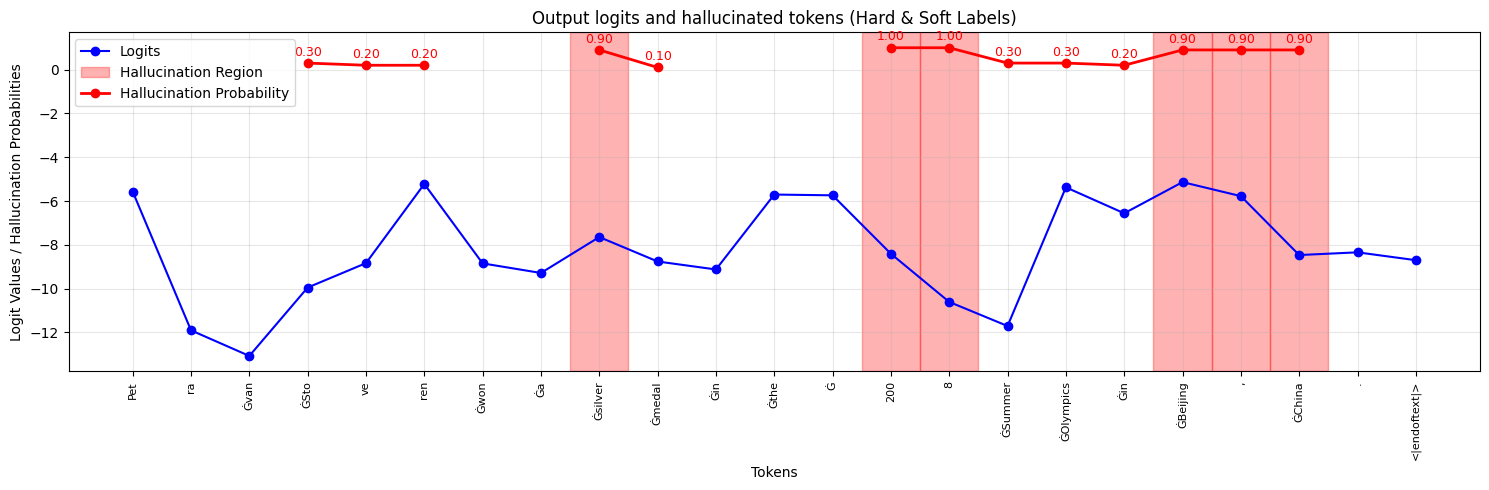

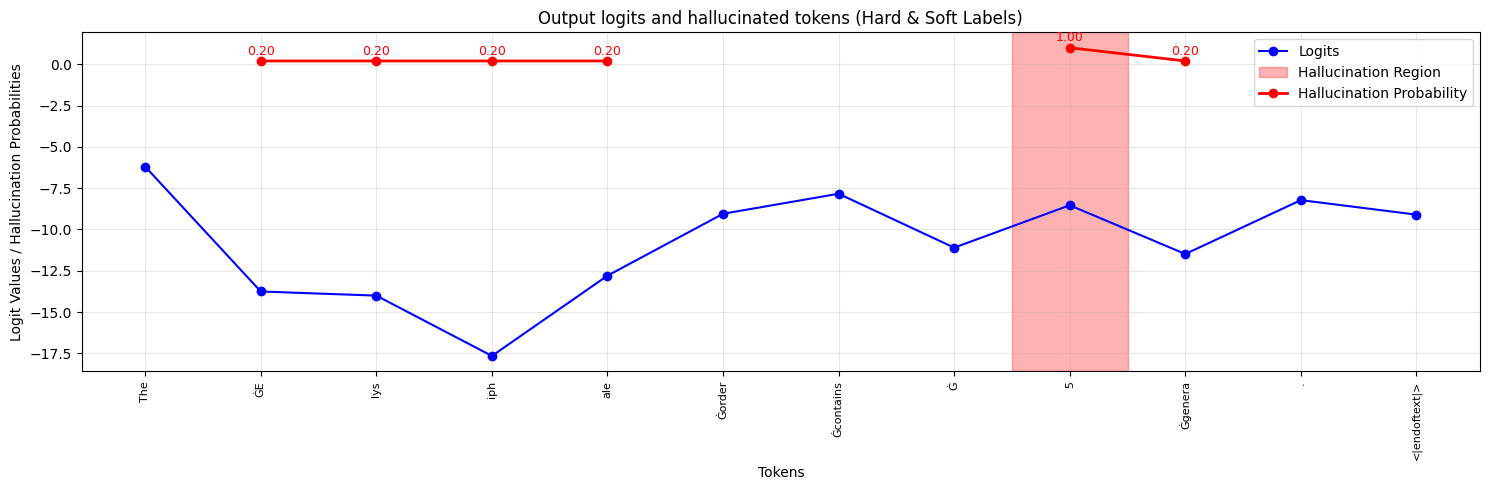

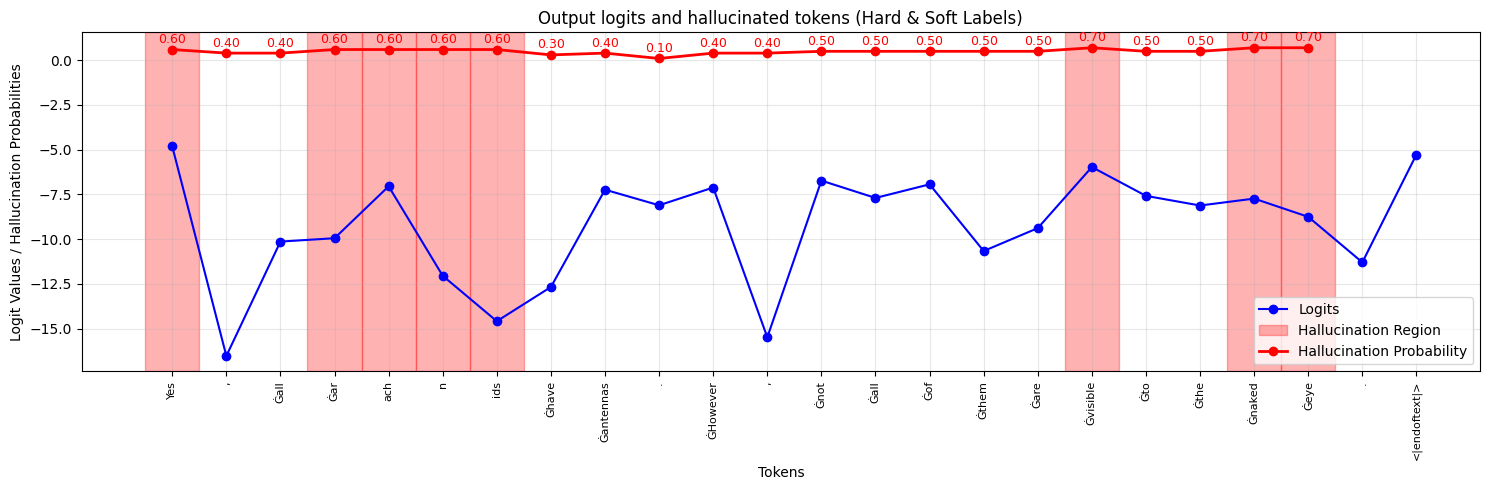

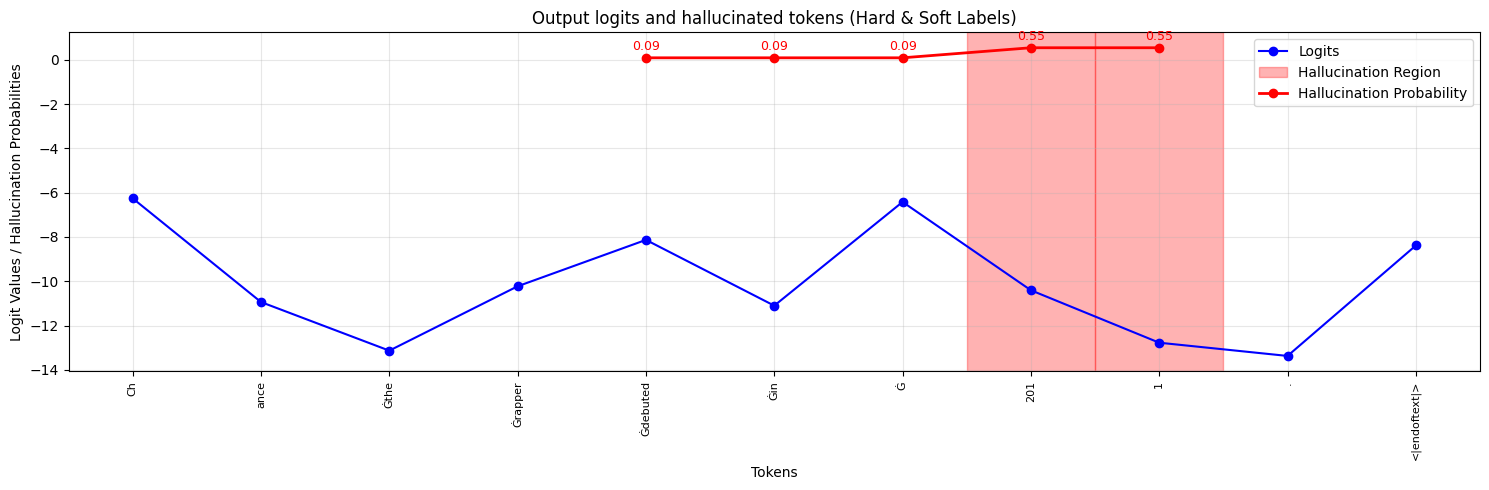

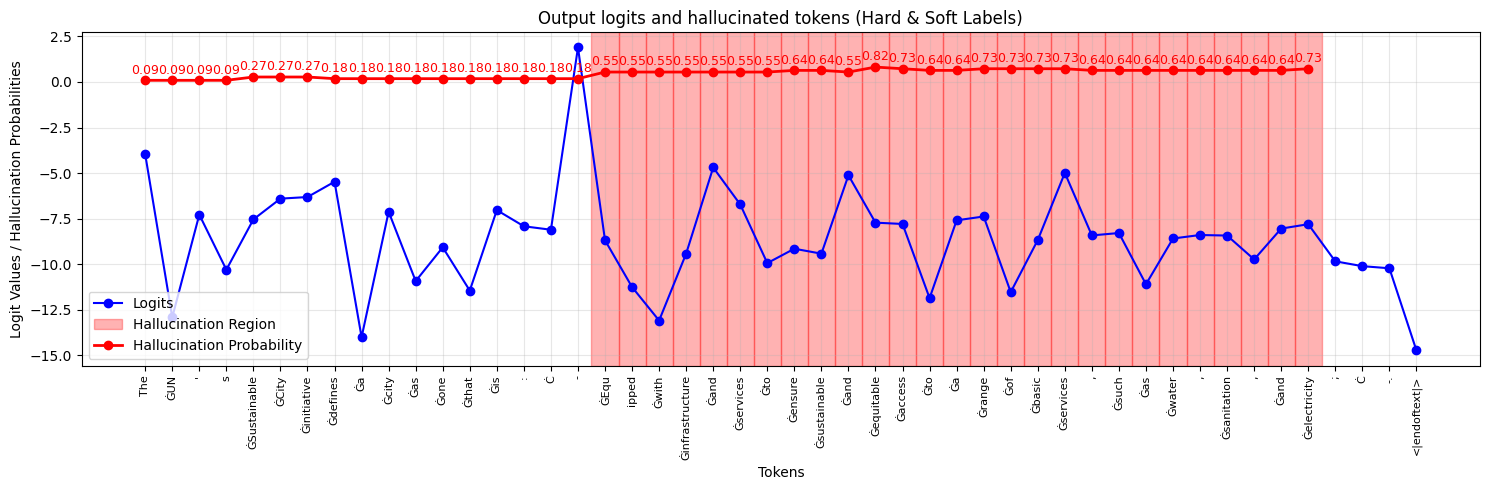

In [12]:
for i in range(5):
    plot_hallucination(val_set.loc[i])

It doesn't seem that there's any correlation between output logits and hallucinations.